In [19]:
import cv2 as cv
import numpy as np
import pytesseract as pt

import matplotlib.pyplot as plt

In [2]:
# Load image, grayscale, Otsu's threshold
image = cv.imread('test_file/img.png')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]

# Morph operations
opening_kernel = cv.getStructuringElement(cv.MORPH_RECT, (1,1))
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, opening_kernel, iterations=1)

In [3]:
# kernel = cv.getStructuringElement(cv.MORPH_RECT, (11,11))
# dilate = cv.dilate(opening, kernel, iterations=1)
# plt.figure(figsize=(25,15))
# plt.imshow(dilate, cmap='gray')
# plt.show()

In [4]:
# Remove center line
# cnts = cv.findContours(dilate, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# for c in cnts:
#     area = cv.contourArea(c)
#     x,y,w,h = cv.boundingRect(c)
#     ar = w / float(h)
#     if area > 10000 and area < 12500 and ar < .5:
#         cv.drawContours(dilate, [c], -1, 0, -1)

In [5]:
# Dilate more
kernel = cv.getStructuringElement(cv.MORPH_RECT, (16,16))
dilate = cv.dilate(opening, kernel, iterations=1)

# Draw boxes
cnts = cv.findContours(dilate, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv.contourArea(c)
    if area > 1000:
        x,y,w,h = cv.boundingRect(c)
        cv.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 3)

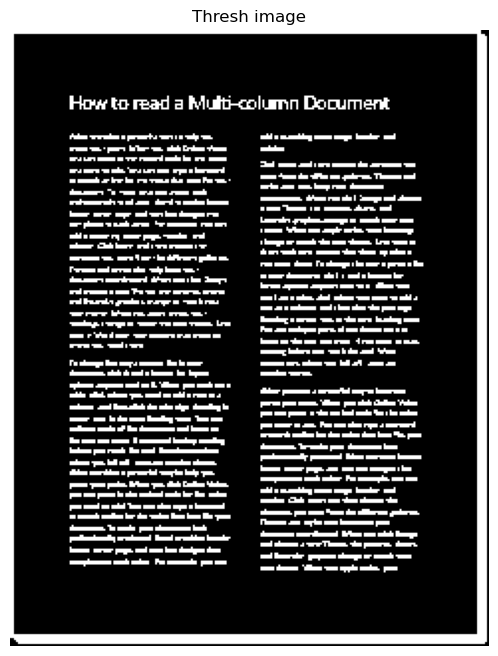

In [6]:
# cv.imwrite('thresh.png', thresh)
plt.figure(figsize=(10,8))
plt.imshow(thresh, cmap='gray');plt.title("Thresh image");plt.axis("off");
plt.show()

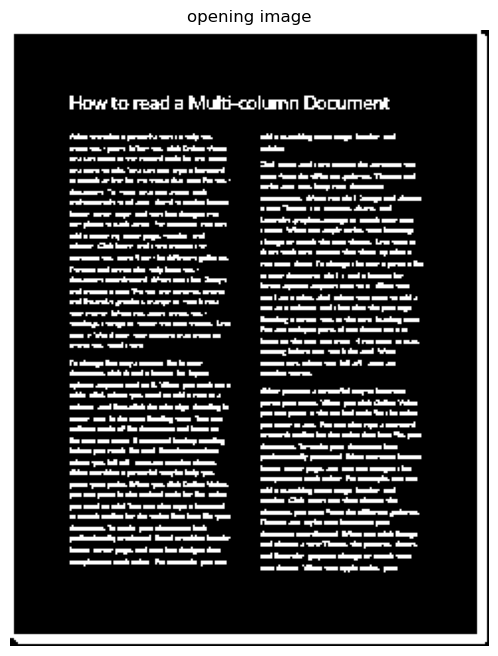

In [7]:
# cv.imwrite('opening.png', opening)
plt.figure(figsize=(10,8))
plt.imshow(opening, cmap='gray');plt.title("opening image");plt.axis("off")
plt.show()

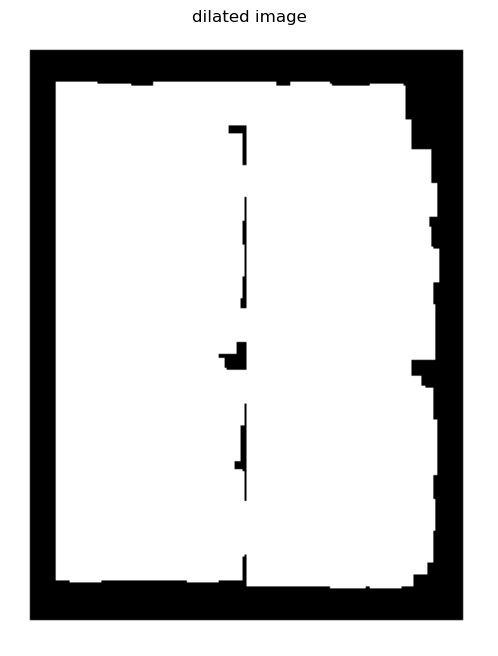

In [8]:
# cv.imwrite('dilate.png', dilate)
plt.figure(figsize=(10,8))
plt.imshow(dilate, cmap='gray');plt.title("dilated image");plt.axis("off")
plt.show()

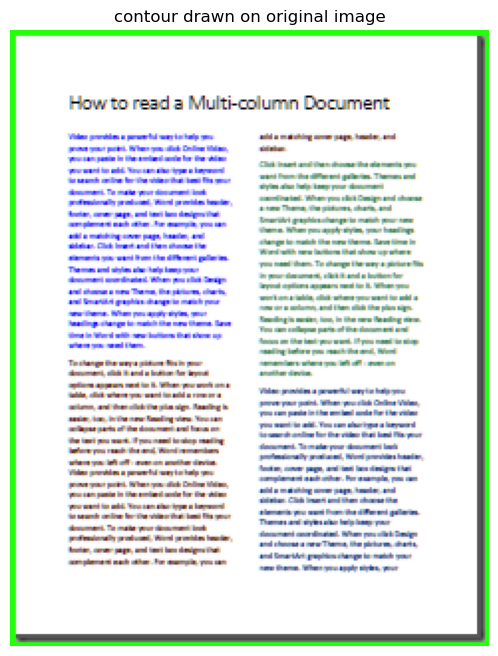

In [9]:
# cv.imwrite('image.png', image)
plt.figure(figsize=(10,8))
plt.imshow(image, cmap='gray');plt.title("contour drawn on original image");plt.axis("off")
plt.show()

# testing

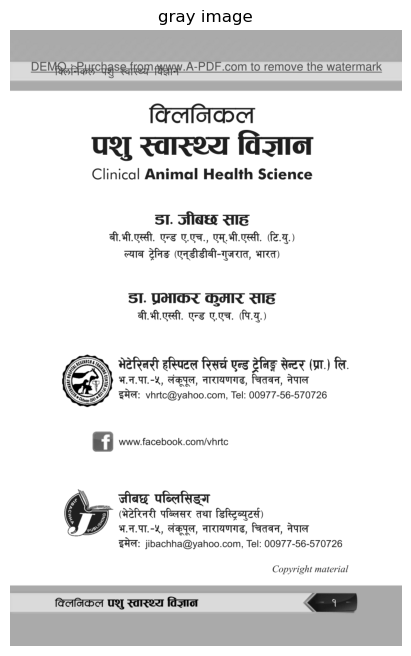

In [10]:
#image preprocessing
original_image = cv.imread('test_file/test.png')

#converting to grayscale image
gray_image = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)
plt.figure(figsize=(10,8))
plt.imshow(gray_image, cmap='gray');plt.title("gray image");plt.axis("off")
plt.show()

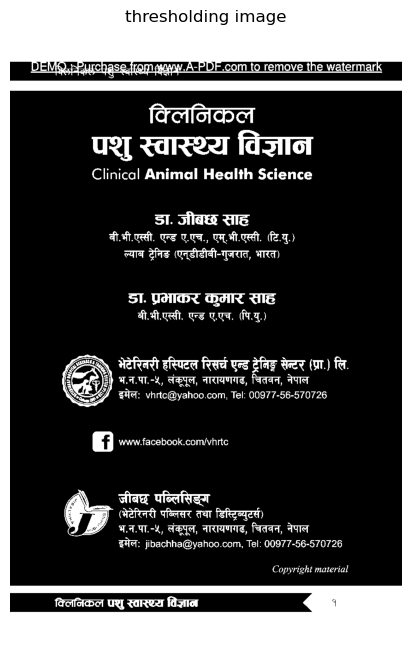

In [11]:
#preprocessing
def thresholding(image):
    gray_img = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    ret,thresh = cv.threshold(gray_img, 0, 255, cv.THRESH_OTSU | cv.THRESH_BINARY_INV)
    plt.figure(figsize=(10,8))
    plt.imshow(thresh, cmap='gray');plt.title("thresholding image");plt.axis("off")
    return thresh

thresh_img = thresholding(original_image)

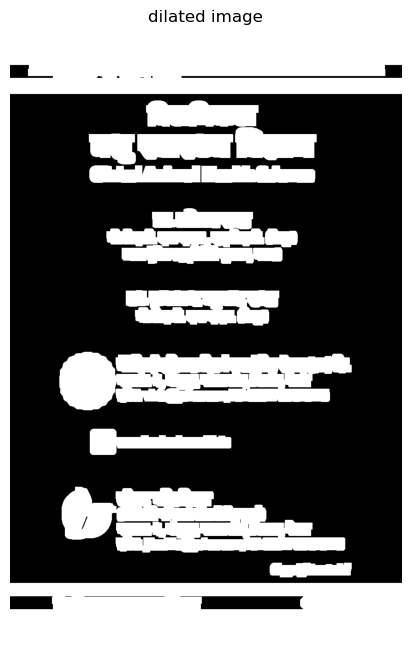

In [12]:
#dilation
kernel = cv.getStructuringElement(cv.MORPH_RECT, (14, 14))

# Applying dilation on the threshold image
dilated_image = cv.dilate(thresh_img, kernel, iterations = 1)

plt.figure(figsize=(10, 8))
plt.imshow(dilated_image, cmap='gray');plt.title("dilated image");plt.axis("off")
plt.show()

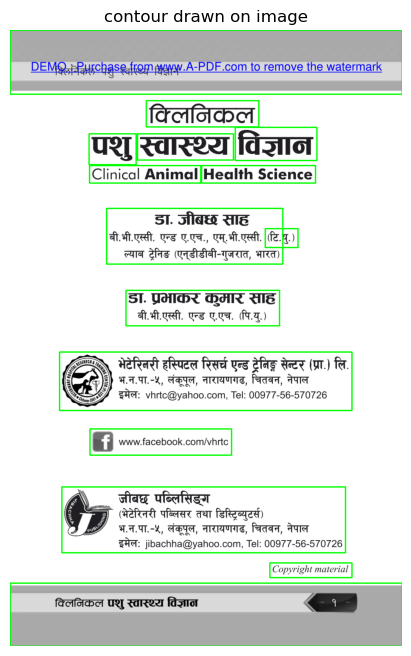

In [13]:
(contours, heirarchy) = cv.findContours(dilated_image.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
sorted_contours_lines = sorted(contours, key = lambda ctr : cv.boundingRect(ctr)[1])

#line segmentation
img2 = original_image.copy()

for ctr in contours:
    
    x,y,w,h = cv.boundingRect(ctr)
    cv.rectangle(img2, (x,y), (x+w, y+h), (0, 255, 0), 2)

plt.figure(figsize=(10,8))
plt.imshow(img2);plt.title("contour drawn on image");plt.axis("off");
plt.show()

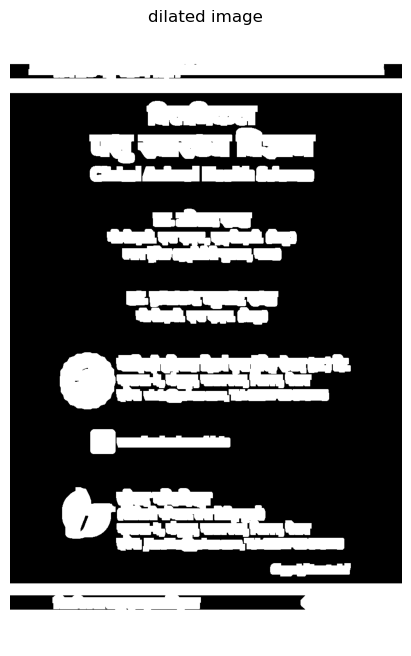

In [14]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (11, 11))

# Applying dilation on the threshold image
dilated_image = cv.dilate(thresh_img, kernel, iterations = 1)

plt.figure(figsize=(10, 8))
plt.imshow(dilated_image, cmap='gray');plt.title("dilated image");plt.axis("off")
plt.show()

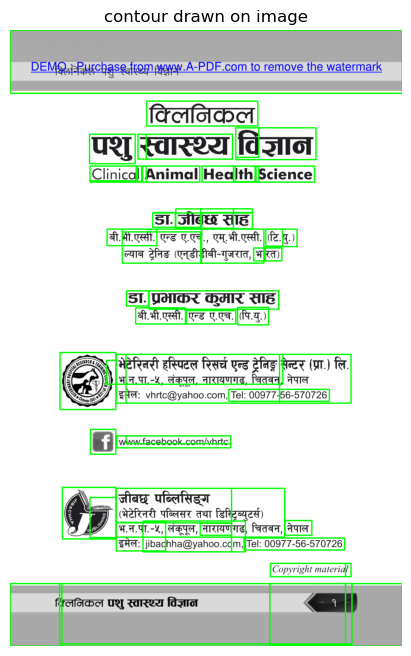

In [15]:
img3 = original_image.copy()
words_list = []

for line in sorted_contours_lines:
    
    # roi of each line
    x, y, w, h = cv.boundingRect(line)
    roi_line = dilated_image[y:y+w, x:x+w]
    
    # draw contours on each word
    (cnt, heirarchy) = cv.findContours(roi_line.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    sorted_contour_words = sorted(cnt, key=lambda cntr : cv.boundingRect(cntr)[0])
#     print(sorted_contour_words)
    
    for word in sorted_contour_words:
        
#         if cv.contourArea(word) < 200:
#             continue
        
        x2, y2, w2, h2 = cv.boundingRect(word)
        words_list.append([x+x2, y+y2, x+x2+w2, y+y2+h2])
        cv.rectangle(img3, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (0,255,0),2)
        
plt.figure(figsize=(10,8))
plt.imshow(img3);plt.title("contour drawn on image");plt.axis("off")
plt.show()

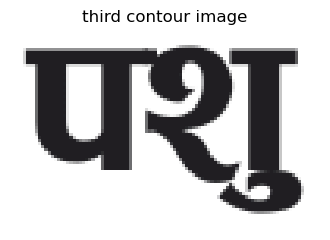

In [16]:
third_word = words_list[2]
roi_9 = original_image[third_word[1]:third_word[3], third_word[0]:third_word[2]]

plt.figure(figsize=(4,3))
plt.imshow(roi_9);plt.title("third contour image");plt.axis("off")
plt.show()

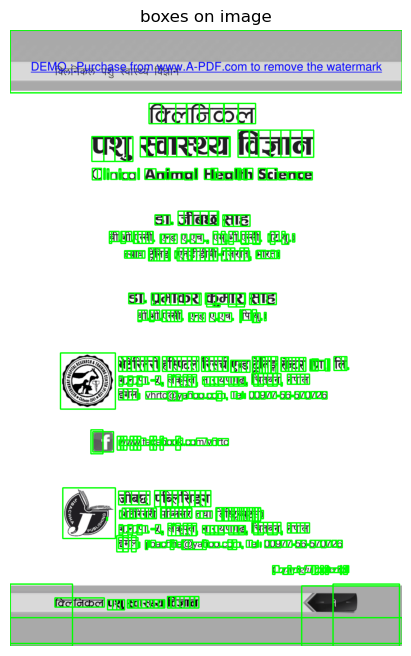

In [31]:
#for character boxes
img = cv.imread('test_file/test.png')

custom_config = r'-l nep --oem 3 --psm 1'
box = pt.image_to_boxes(img, config=custom_config)

hImg, wImg, _ = img.shape

for a in box.splitlines():
    a = a.split()
    x,y = int(a[1]), int(a[2])
    w,h = int(a[3]), int(a[4])
    
    cv.rectangle(img, (x,hImg-y), (w,hImg-h), (0,255,0), 2)
    #to show the text
#     cv.putText(img, a[0], (x,y), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
    
plt.figure(figsize=(10,8))
plt.imshow(img);plt.title("boxes on image");plt.axis("off")
plt.show()   

  उपकथा धेरै-धेरै पहिलेको कथा हो यो, अतीतको यति धमिलो गर्भबाट आएको कि जर्तमानमा हाम्रो कानमा यो पुराणजस्तो ध्यनिता हुन्छ । प्राचीन बुतान्तहरूलाई आजकालका हामी आफ्नो वैयक्तिक अनुभवद्ारा प्रहण गर्न सक्दैनौ, ती हाम्रा जीवनका औवित अनुभूति हुन सक्दैनन्‌ । न आफ्नौ प्रैमको न्यानोले हाम्रो हृदबनाई तताउन सक्छन्‌, न आफ्नो दुखे हाम्रो आँखालाई रसाउन नै सक्छन्‌ । हाम्रो जीवनको अनुभवसँग असम्बड ती पुराना घटताहरूले सत्य र असत्यको मापबाट आफूलाई एकदम मुक्त पारिसकेका हुन्छन्‌ । हामी यो अनुसन्धान गर्दैनौ कि कहाँसम्म त्यसका वर्णन सत्य जत या असत्य | बढि तिनले हामीमा चाख उत्पन्न गराउन सक्दछत्‌ धने केवल यस कारणले कि ती कथाहरूमा हामी स्थान-कालोतरका केही सत पाउँछौ केही प्रतीकात्मक प्राप्त तिनमा रहेकाले । दश हजार वर्ष बाँच्ने श्रधि वैज्ञानिक सत्य होइन, ज चिजकारमे कागतमा रँगेको रातौ सूर्य नै वैज्ञानिक सत्य हौ। ती प्रतीक हुन्‌ । अनुभवभन्दा बाहिर पाउन सस्नै चाख प्रतीकात्मक हुन्छ, सक्ेतजनित । त्यसैले यो कथा सत्य र असत्यको तराजुमा नजोखिने एउटा युतान्त हो । यसको महत्व पौराशिक छ, सञ्ेतमय, प्रतीकात्यक । हिमालयका पर्वतहरू

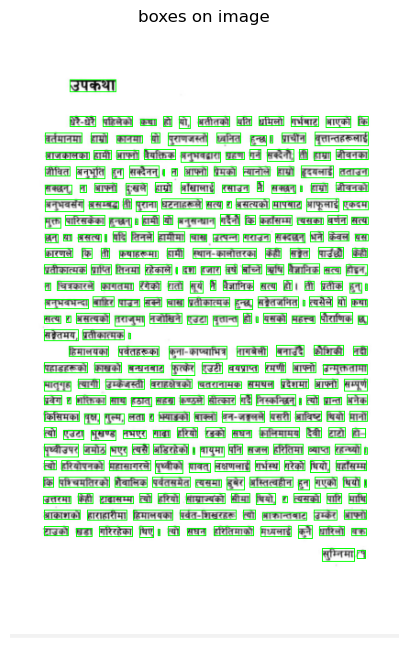

In [63]:
#for word level boxes
img = cv.imread('test_file/screenshot.png')

custom_config = r'-l nep --oem 3 --psm 1'
box = pt.image_to_data(img, config=custom_config)

# hImg, wImg, _ = img.shape

final_text = " "
for z, a in enumerate(box.splitlines()):
    if z != 0:
        a = a.split()
        if len(a) == 12:
            x,y = int(a[6]), int(a[7])
            w,h = int(a[8]), int(a[9])
            
            final_text += " " + a[11]
            
            cv.rectangle(img, (x,y), (x + w, y + h), (0,255,0), 1)
            #to show the text
            #cv.putText(img, a[11], (x,y+25), cv.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

print(final_text)

plt.figure(figsize=(10,8))
plt.imshow(img);plt.title("boxes on image");plt.axis("off")
plt.show()   